<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png">

# Handling Missing Values
## Sara Aldubaie


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [2]:
# reading the file 
burritos = pd.read_csv("./data/burritos.csv")
print(f"Rows: {burritos.shape[0]}\nColumns: {burritos.shape[1]}")
# Using with to print all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(burritos.head())


Rows: 423
Columns: 66


,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Summary statistics about the numerical data
burritos.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Queso
count,87.000000,87.000000,416.000000,420.000000,22.000000,22.000000,284.000000,282.000000,282.000000,423.000000,403.000000,409.000000,420.000000,414.000000,421.000000,398.000000,421.000000,420.000000,421.000000,0.0
mean,3.887356,4.167816,7.065216,3.496095,546.181818,0.675277,20.046901,22.131738,0.786489,3.519385,3.780397,3.622249,3.542024,3.589082,3.434086,3.372613,3.587767,3.981190,3.620887,NaN
std,0.475396,0.373698,1.503645,0.811466,144.445619,0.080468,2.084957,1.777526,0.152260,0.793301,0.980044,0.828384,0.801253,0.996292,1.069349,0.922434,0.886277,1.115803,0.755718,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.700000,3.000000,3.000000,3.500000,3.100000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,3.800000,NaN
75%,4.000000,4.400000,7.860000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.100000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [4]:
# Summary statistics about the categorical data
burritos.describe(exclude= 'number')

,Location,Burrito,Date,Neighborhood,Address,URL,Chips,Rec,Reviewer,Notes,...,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
count,423,423,423,92,88,87,26,233,422,146,...,4,4,1,5,3,3,2,13,3,1
unique,108,132,169,41,87,86,4,6,106,145,...,1,1,1,1,1,1,1,1,2,1
top,Lucha Libre North Park,California,8/30/2016,Clairemont,9500 Gilman Dr,https://www.yelp.com/biz/el-dorado-mexican-foo...,x,Yes,Scott,Bland,...,x,x,x,x,x,x,x,x,x,x
freq,28,101,29,9,2,2,21,157,147,2,...,4,4,1,5,3,3,2,13,2,1


In [5]:
# some of rows have X,x instead of NaN, so we need to replace them with NaN. 
missing_val = ['X', 'x']

burritos.replace(missing_val, np.nan, inplace = True)


In [29]:
# finding the values count for each column
#for col in burritos.columns:
#   print(col,'\n',burritos[col].value_counts().to_string())

#### Q1: Create a histogram or bar chart of what the distribution of values looks like before handling NaN values and after. Each plot must have the following:
- Axis Labels
-Title

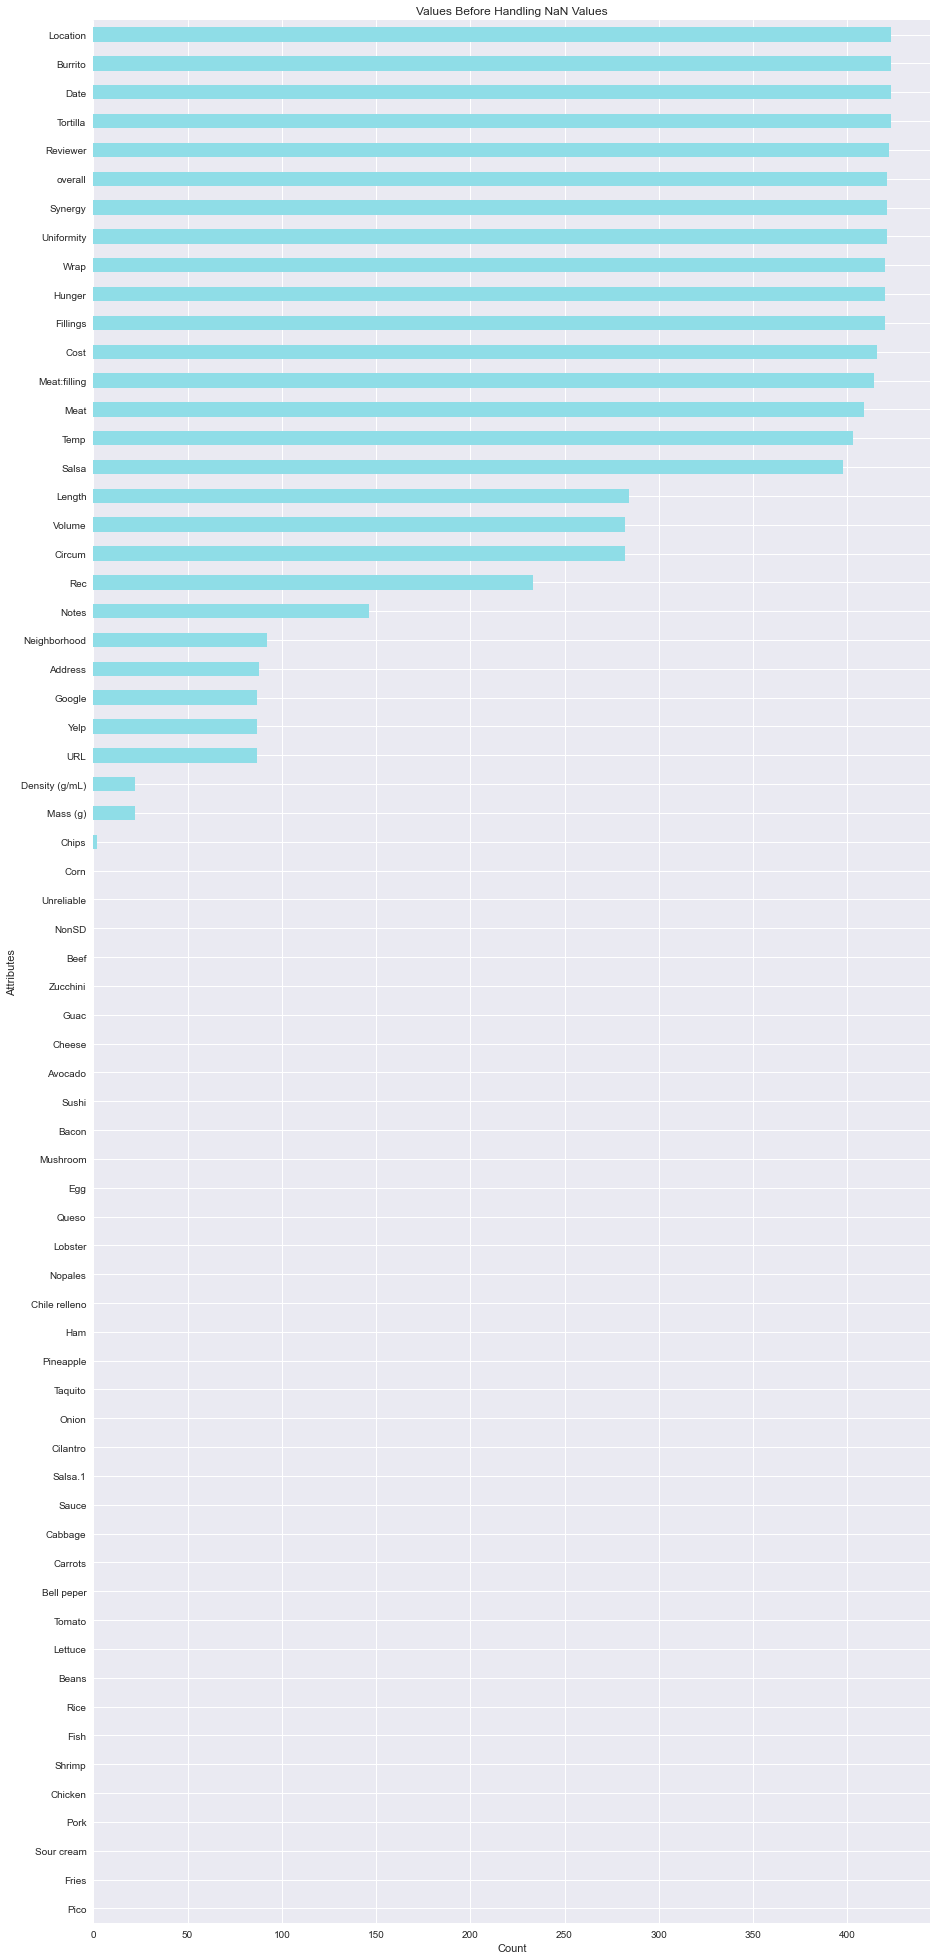

In [7]:
# Create a histogram or bar chart of what the distribution of values looks like before handling NaN values 
plt.figure(figsize=(15,35)) # figure size 
plot = burritos.notnull().sum().sort_values().plot(kind="barh", color = '#8FDDE7',title="Values Before Handling NaN Values")
plt.xlabel("Count")
plt.ylabel("Attributes");

#### Q2: Determine how many missing values are present in each column?

In [8]:
print(burritos.isnull().sum().to_string())

Location            0
Burrito             0
Date                0
Neighborhood      331
Address           335
URL               336
Yelp              336
Google            336
Chips             421
Cost                7
Hunger              3
Mass (g)          401
Density (g/mL)    401
Length            139
Circum            141
Volume            141
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
overall             2
Rec               190
Reviewer            1
Notes             277
Unreliable        423
NonSD             423
Beef              423
Pico              423
Guac              423
Cheese            423
Fries             423
Sour cream        423
Pork              423
Chicken           423
Shrimp            423
Fish              423
Rice              423
Beans             423
Lettuce           423
Tomato            423
Bell peper

#### Q3: Determine the total amount of missing values?

In [9]:
burritos.isnull().sum().sum()

19527

In [10]:
#percentage of null values in each column. needed in handling null values. 
print(((burritos.isnull().sum()/423)*100).to_string())

Location            0.000000
Burrito             0.000000
Date                0.000000
Neighborhood       78.250591
Address            79.196217
URL                79.432624
Yelp               79.432624
Google             79.432624
Chips              99.527187
Cost                1.654846
Hunger              0.709220
Mass (g)           94.799054
Density (g/mL)     94.799054
Length             32.860520
Circum             33.333333
Volume             33.333333
Tortilla            0.000000
Temp                4.728132
Meat                3.309693
Fillings            0.709220
Meat:filling        2.127660
Uniformity          0.472813
Salsa               5.910165
Synergy             0.472813
Wrap                0.709220
overall             0.472813
Rec                44.917258
Reviewer            0.236407
Notes              65.484634
Unreliable        100.000000
NonSD             100.000000
Beef              100.000000
Pico              100.000000
Guac              100.000000
Cheese        

#### Q4: Choose a column and replace NaN values with the mean. 

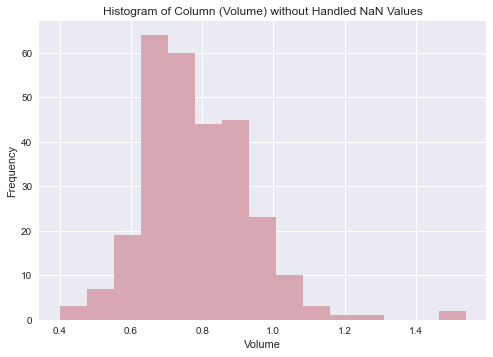

In [11]:
# I choose the column "Volume" since it have 33% null values 

# Plot a histogram
burritos['Volume'].plot(kind="hist", 
            bins=15, 
            color = '#D8A7B1', 
            title="Histogram of Column (Volume) without Handled NaN Values")
plt.xlabel("Volume");

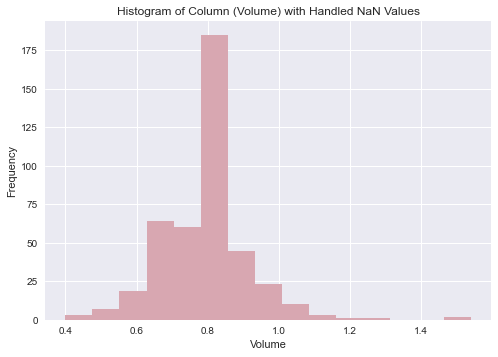

In [12]:
# Handling null values in column Volume by using mean 

volume_mean = round(burritos['Volume'].mean(),2)

# replace null with column mean 

burritos['Volume'] = burritos['Volume'].replace(np.NaN, volume_mean)

# Choose a column and replace NaN values with the mean
# I choose the column "Volume" since it have 33% null values 

# Plot a histogram
burritos['Volume'].plot(kind="hist", 
            bins=15, 
            color = '#D8A7B1', 
            title="Histogram of Column (Volume) with Handled NaN Values")
plt.xlabel("Volume");


#### Q5: Choose a column and replace NaN values with the median.

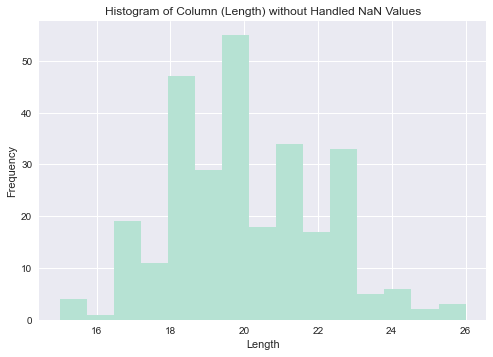

In [13]:
# I choose the column "Length" since it have 32% null values 

# Plot a histogram
burritos['Length'].plot(kind="hist", 
            bins=15, 
            color = '#B6E2D3', 
            title="Histogram of Column (Length) without Handled NaN Values")
plt.xlabel("Length");

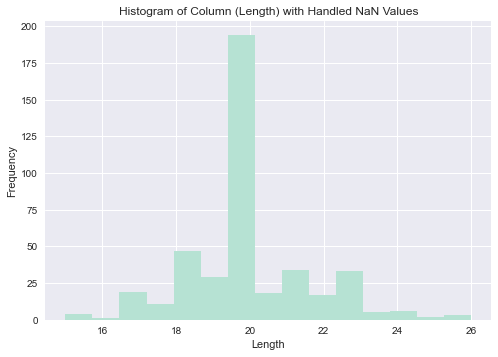

In [14]:
# Handling null values in column Volume by using median 

len_median = burritos['Length'].median()

# replace null with column mean 

burritos['Length'] = burritos['Length'].replace(np.NaN, len_median)

# Plot a histogram
burritos['Length'].plot(kind="hist", 
            bins=15, 
            color = '#B6E2D3', 
            title="Histogram of Column (Length) with Handled NaN Values")
plt.xlabel("Length");

#### Q6: Choose a column and replace NaN values with the mode.

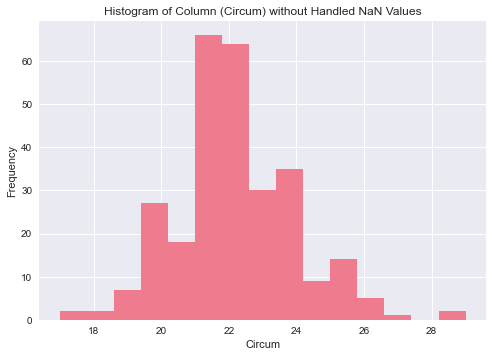

In [15]:
# I choose the column "Circum" since it have 33% null values 

# Plot a histogram
burritos['Circum'].plot(kind="hist", 
            bins=15, 
            color = '#EF7C8E', 
            title="Histogram of Column (Circum) without Handled NaN Values")
plt.xlabel("Circum");

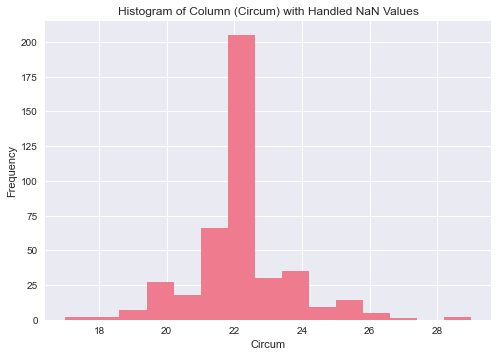

In [16]:
# Handling null values in column Volume by using mode 

circum_mode = burritos['Circum'].mode()

# replace null with column mean 

burritos['Circum'] = burritos['Circum'].replace(np.NaN, circum_mode[0])

# Plot a histogram
burritos['Circum'].plot(kind="hist", 
            color = '#EF7C8E',
            bins=15, 
            title="Histogram of Column (Circum) with Handled NaN Values")
plt.xlabel("Circum");

#### Q7: Choose a column and replace NaN values with your own value.


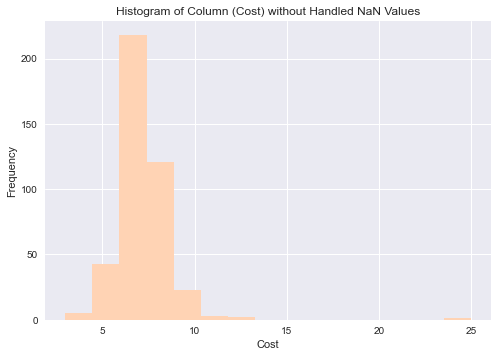

In [17]:
# I choose the column "Cost" since it have 1.6% null values 
# Plot a histogram
burritos['Cost'].plot(kind="hist", 
            color = '#ffd3b4', 
            bins=15, 
            title="Histogram of Column (Cost) without Handled NaN Values")
plt.xlabel("Cost");

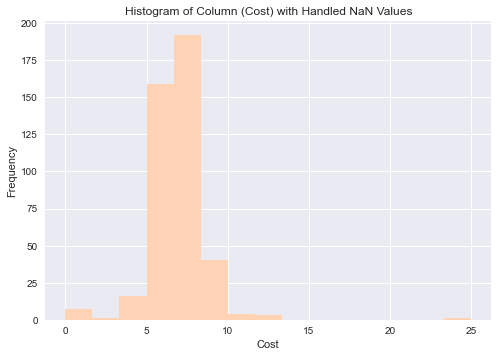

In [18]:
# Handling null values in column Volume by using new Value (0)
Cost_fill = 0.00
burritos['Cost'] = burritos['Cost'].fillna(Cost_fill)

# Plot a histogram
burritos['Cost'].plot(kind="hist", 
            color = '#ffd3b4', 
            bins=15, 
            title="Histogram of Column (Cost) with Handled NaN Values")
plt.xlabel("Cost");

#### Q8: Choose a column and use backwards filling.


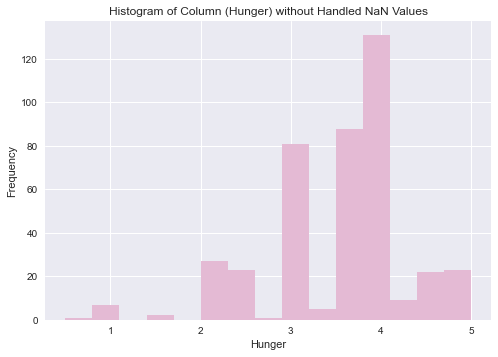

In [19]:
# I choose the column "Hunger" since it have 0.7% null values 

# Plot a histogram
burritos['Hunger'].plot(kind="hist", 
            color = '#e4bad4', 
            bins=15, 
            title="Histogram of Column (Hunger) without Handled NaN Values")
plt.xlabel("Hunger");

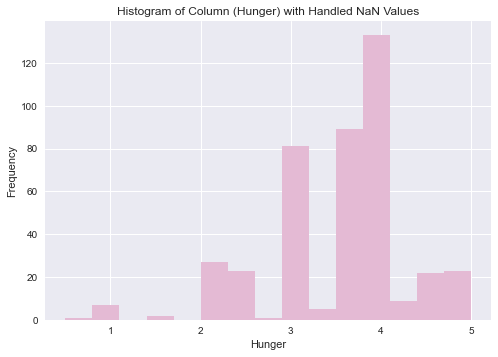

In [20]:
# Handling null values in column Volume by using backwards filling 

# forwards filling
burritos['Hunger'] = burritos['Hunger'].fillna(method="bfill")

# Plot a histogram
burritos['Hunger'].plot(kind="hist", 
            color = '#e4bad4', 
            bins=15, 
            title="Histogram of Column (Hunger) with Handled NaN Values")
plt.xlabel("Hunger");

#### Q9: Choose a column and use forwards filling.

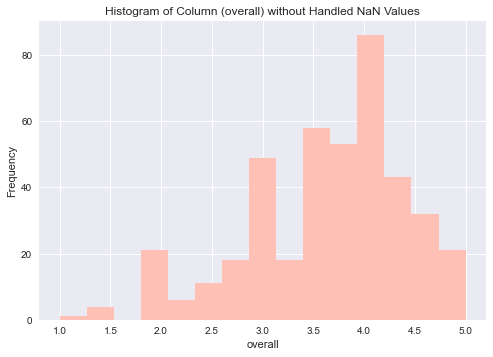

In [21]:
# I choose the column "overall" since it have 0.4% null values 

# Plot a histogram
burritos['overall'].plot(kind="hist", 
            bins=15, 
            color = '#ffc1b6', 
            title="Histogram of Column (overall) without Handled NaN Values")
plt.xlabel("overall");

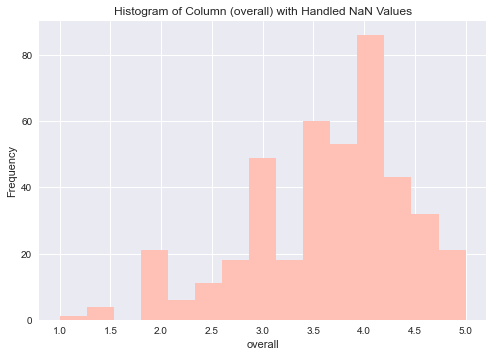

In [22]:
# Handling null values in column Volume by using forwards filling 

# forwards filling
burritos['overall'] = burritos['overall'].fillna(method="ffill")

# Plot a histogram
burritos['overall'].plot(kind="hist", 
            bins=15, 
            color = '#ffc1b6', 
            title="Histogram of Column (overall) with Handled NaN Values")
plt.xlabel("overall");

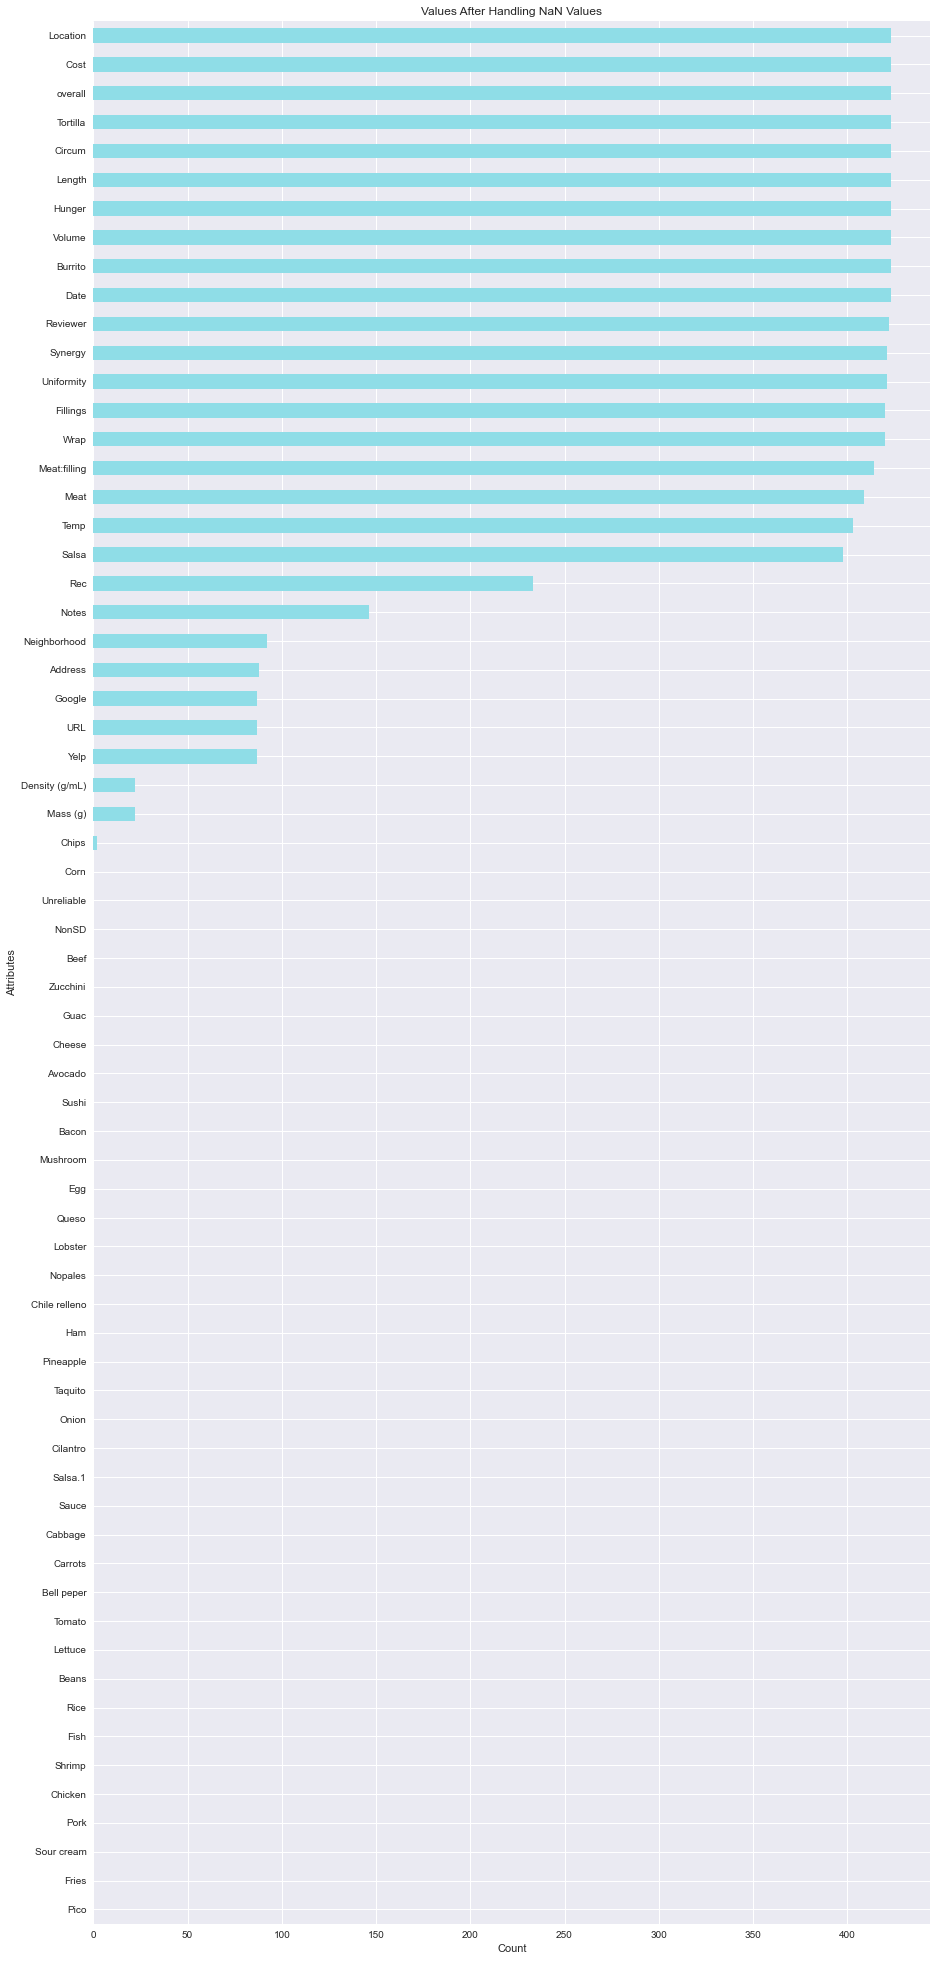

In [23]:
# Create a histogram or bar chart of what the distribution of values looks like after handling NaN values 
plt.figure(figsize=(15,35)) # figure size 
plot = burritos.notnull().sum().sort_values().plot(kind="barh", color = '#8FDDE7', title="Values After Handling NaN Values")
plt.xlabel("Count")
plt.ylabel("Attributes");